<h2 style="text-align:center;">Customer Churn Analysis</h2>

#### Columns Decription

- **CustomerID** - Customer ID
- **Gender** - Whether the customer is a male or a female
- **SeniorCitizen** - Whether the customer is a senior citizen (1, 0)
- **Partner** - Whether the customer has a partner (Yes, No)
- **Dependents** - Whether the customer has dependents (Yes, No)
- **Tenure** - Number of months the customer has stayed with the company
- **PhoneService** - Whether the customer has a phone service (Yes, No)
- **MultipleLines** - Whether the customer has multiple lines (Yes, No, No phone service)
- **InternetService** - Customer’s internet service provider (DSL, Fiber optic, No)
- **OnlineSecurity** - Whether the customer has online security (Yes, No, No internet service)
- **OnlineBackup** - Whether the customer has online backup or not (Yes, No, No internet service)
- **DeviceProtection** - Whether the customer has device protection (Yes, No, No internet service)
- **TechSupport** - Whether the customer has tech support (Yes, No, No internet service)
- **StreamingTV** - Whether the customer has streaming TV service (Yes, No, No internet service)
- **StreamingMovies** - Whether the customer has streaming movies service (Yes, No, No internet service)
- **Contract** - Indicates the type of the contract (Month-to-month, One year, Two years)
- **PaperlessBilling** - Whether the customer has paperless billing (Yes, No)
- **PaymentMethod** - Indicates the payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- **MonthlyCharges** - Indicates the current monthly subscription cost of the customer
- **TotalCharges** - Indicates the total charges paid by the customer so far
- **Churn** - Indicates whether the customer churned

#### Importing libraries

In [7]:
#----main libraries----
import numpy as np
import pandas as pd

#----plotting libraries----
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

#----regular expressions----
import re

#----model and support imports----
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, ConfusionMatrixDisplay

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from xgboost import XGBClassifier
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    MinMaxScaler, 
    PolynomialFeatures,
    KBinsDiscretizer
)
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

ModuleNotFoundError: No module named 'sklearn'

In [2]:
df = pd.read_csv('Telco-Churn.csv')

#### Exploring data set

In [2]:
#Get overview of the data
def dataoveriew(df, message):
    print(f'{message}:\n')
    print('Number of rows: ', df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nData Features:")
    print(df.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())
    
dataoveriew(df, 'Overview of the dataset')

NameError: name 'df' is not defined

we have 21 columns, and 7043 rows</br>
we have 3 columns have numeric values, and 18 columns have categoricl values</br>
we can see that we have no null values as all columns have same count of non_null values</br>

In [4]:
#Sample Overview
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5806,7854-EKTJL,Female,0,No,Yes,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.60,35.85,Yes
2744,0815-MFZGM,Female,0,Yes,No,42,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),99.00,4135,No
6281,7435-ZNUYY,Male,0,No,No,6,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.60,116.6,No
2800,0519-DRGTI,Female,0,Yes,Yes,20,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.35,442.6,No
2914,0484-FFVBJ,Male,0,No,No,32,Yes,No,DSL,No,...,No,No,Yes,Yes,One year,Yes,Bank transfer (automatic),64.85,2010.95,No
2239,8069-RHUXK,Female,0,Yes,Yes,67,No,No phone service,DSL,Yes,...,No,Yes,No,No,Two year,No,Credit card (automatic),35.70,2545.7,No
5559,6339-DKLMK,Female,0,No,No,13,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,31.65,389.95,No
1453,5899-OUVKV,Male,0,No,No,31,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.50,2979.2,No
4191,2027-WKXMW,Female,0,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,108.75,6871.7,No
1353,7073-QETQY,Male,0,Yes,Yes,66,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check,20.35,1359.5,No


In [5]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


As we noticed theat customerID columns doesn't provide any meaningfull information so will drop it

In [6]:
#drop customerID
df.drop(columns='customerID', inplace= True)

In [7]:
#Looking for duplicated values
df.duplicated().sum()

22

In [8]:
#drop duplicates rows
df.drop_duplicates(inplace=True)

In [9]:
#Checking missing values
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Data Processing

The above code returns error first and it says it can't convert string object to float. So we need to deal with object values in the Total Charges column

In [10]:
try:
    # Try converting the column to numeric
    pd.to_numeric(df['TotalCharges'])
except ValueError as e:
    # Handle the error (non-numeric values found)
    print(f"Non-integer values found in column '{'TotalCharges'}': {e}")
    # Print or investigate the problematic entries
    problematic_entries = df[~df['TotalCharges'].astype(str).str.isdigit()]
    print("Problematic entries:")

Non-integer values found in column 'TotalCharges': Unable to parse string " " at position 488
Problematic entries:


The above output shows there are empty cells in the 'Total Charges' column (' '). So lets drop them and run the cell which converts type object to integer

In [11]:
TotalCharges = df['TotalCharges'].astype(str).apply(lambda x: x if not re.search('\d+', x)else 'Numeric')
TotalCharges[TotalCharges!='Numeric']

488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object

In [12]:
df.drop(index=TotalCharges[TotalCharges!='Numeric'].index, inplace=True)

In [13]:
#since the column TotalCharges is a type of numeric let's convert it to from object to numeric

df['TotalCharges']= df['TotalCharges'].astype(float)

In [14]:
columns = df.columns
print("----------- Numeric field ----------\n")
for i in range(len(columns)):
    if df[columns[i]].dtypes!=object:
        print("unique number of {} ---> {}".format(columns[i], len(df[columns[i]].unique())))
        
print("\n---------- Categorical field ----------\n")
for i in range(len(columns)):
    if df[columns[i]].dtypes==object:
        print("unique number of {} ---> {}".format(columns[i], len(df[columns[i]].unique())))

----------- Numeric field ----------

unique number of SeniorCitizen ---> 2
unique number of tenure ---> 72
unique number of MonthlyCharges ---> 1584
unique number of TotalCharges ---> 6530

---------- Categorical field ----------

unique number of gender ---> 2
unique number of Partner ---> 2
unique number of Dependents ---> 2
unique number of PhoneService ---> 2
unique number of MultipleLines ---> 3
unique number of InternetService ---> 3
unique number of OnlineSecurity ---> 3
unique number of OnlineBackup ---> 3
unique number of DeviceProtection ---> 3
unique number of TechSupport ---> 3
unique number of StreamingTV ---> 3
unique number of StreamingMovies ---> 3
unique number of Contract ---> 3
unique number of PaperlessBilling ---> 2
unique number of PaymentMethod ---> 4
unique number of Churn ---> 2


#### Data Visualization

Since we are trying to predict the churn, our Targte Column is Churn.

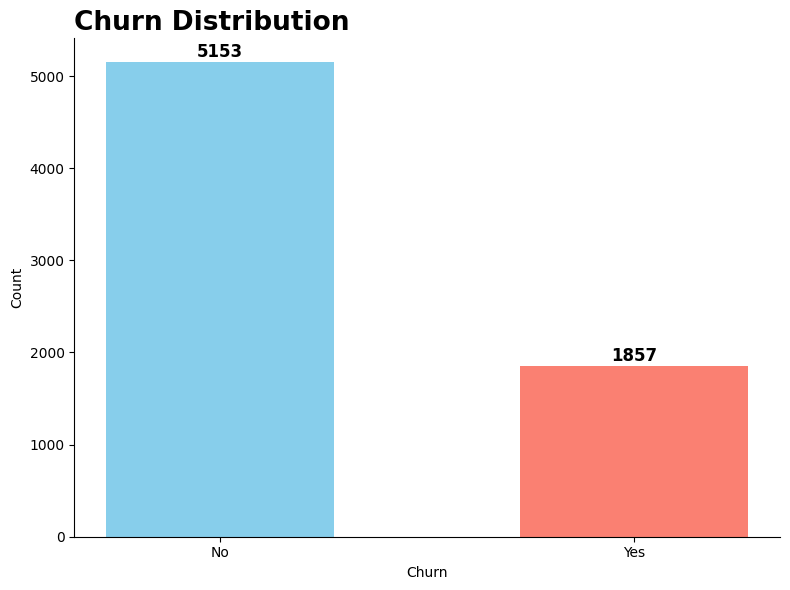

In [15]:
# Get the value counts for 'Churn' column
data_temp = df['Churn'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(8, 6))

# Plotting the bar chart
ax.bar(data_temp.index, data_temp, width=0.55, color=['skyblue', 'salmon'])

# Title and axis labels
ax.set_title('Churn Distribution', loc='left', fontsize=19, fontweight='bold')
ax.set_xlabel('Churn')
ax.set_ylabel('Count')

# Annotate each bar with its count value
for i, count in enumerate(data_temp):
    ax.text(i, count + 50, str(count), ha='center', fontsize=12, fontweight='bold')

# Hide spines on top and right sides
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

plt.tight_layout()
plt.show()

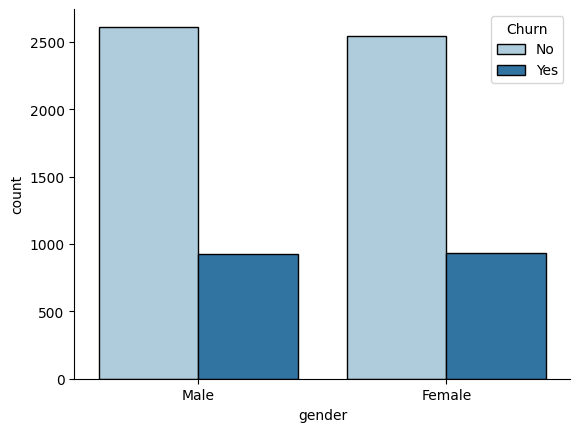

In [16]:
#Chrun vs Gender
sns.countplot(x='gender', hue="Churn", data=df, palette="Paired", edgecolor = 'Black', order=df['gender'].value_counts().index)
sns.despine()

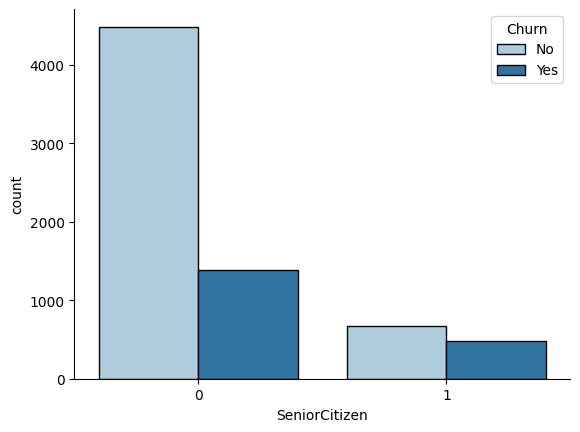

In [17]:
#Churn vs SeniorCitizen
sns.countplot(x='SeniorCitizen', hue="Churn", data=df, palette="Paired", edgecolor = 'Black', order=df['SeniorCitizen'].value_counts().index)
sns.despine()

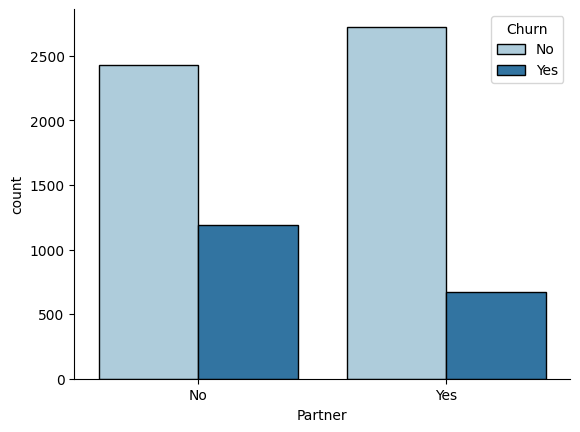

In [18]:
#Chrun vs Partner
sns.countplot(x='Partner', hue="Churn", data=df, palette="Paired", edgecolor = 'Black', order=df['Partner'].value_counts().index)
sns.despine()

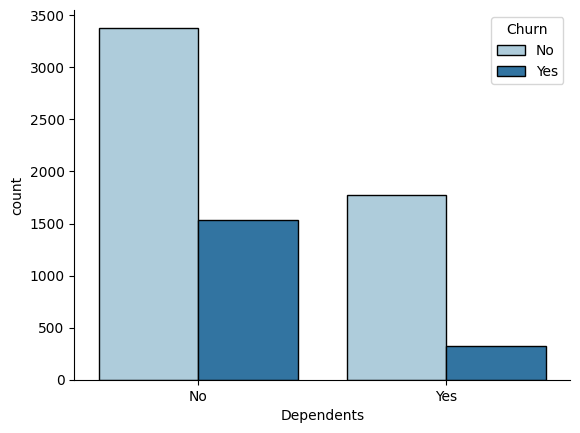

In [19]:
#Churn vs Dependents
sns.countplot(x='Dependents', hue="Churn", data=df, palette="Paired", edgecolor = 'Black', order=df['Dependents'].value_counts().index)
sns.despine()

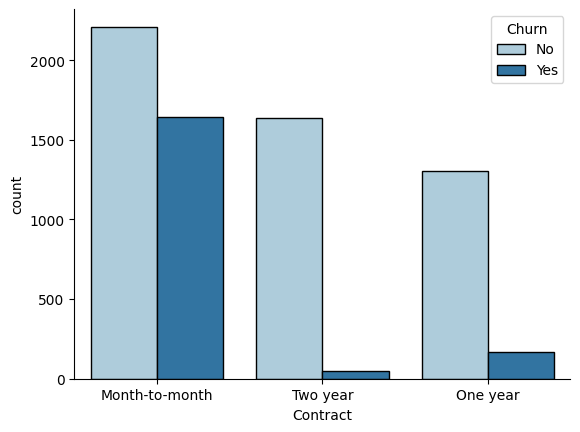

In [20]:
#Chrun vs Contract
sns.countplot(x='Contract', hue="Churn", data=df, palette="Paired", edgecolor = 'Black', order=df['Contract'].value_counts().index)
sns.despine()

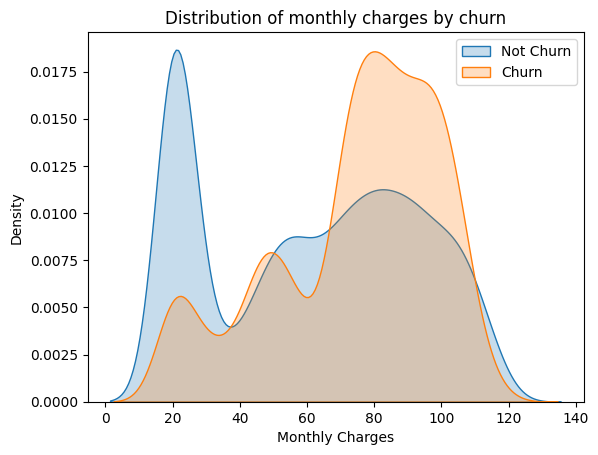

In [21]:
#Chrun vs MonthylyCharges
ax = sns.kdeplot(df['MonthlyCharges'][df["Churn"] == 'No'], fill = True)
ax = sns.kdeplot(df['MonthlyCharges'][df["Churn"] == 'Yes'],ax =ax, fill= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn');

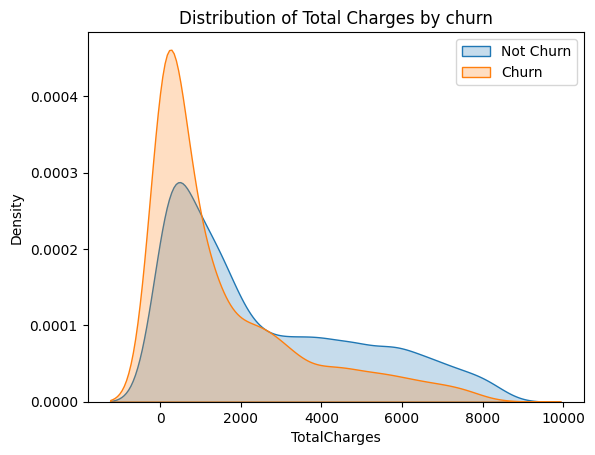

In [22]:
#Churn vs Total Charges
df['TotalCharges']= df['TotalCharges'].astype(float)

ax = sns.kdeplot(df['TotalCharges'][df["Churn"] == 'No'], fill = True)
ax = sns.kdeplot(df['TotalCharges'][df["Churn"] == 'Yes'],ax =ax,fill= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('TotalCharges')
ax.set_title('Distribution of Total Charges by churn');

#### Segmentation, and Cluster Analysis

1- Preprocess and encode Categorical Data</br>
2- Scale Numerical Columns</br>
3- Apply Clustering Algorithm</br>

In [23]:
cluster_df= df.copy()

numerics_columns= ['tenure', 'MonthlyCharges', 'TotalCharges']
cate_columns= [i for i in df.columns if i not in numerics_columns]

scaler = StandardScaler()
cluster_df[numerics_columns]= scaler.fit_transform(cluster_df[numerics_columns])

# Label Encoding for categorical columns
label_encoders = {}
for col in cate_columns:
    label_encoders[col] = LabelEncoder()
    cluster_df[col] = label_encoders[col].fit_transform(cluster_df[col])

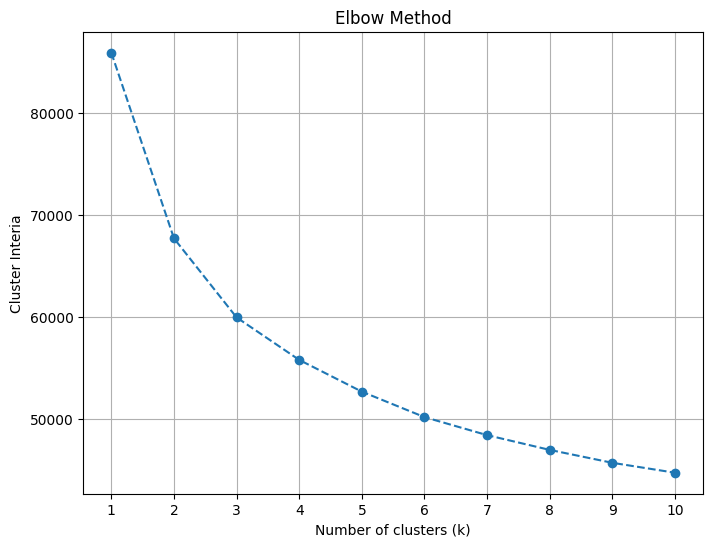

In [24]:
wcss = []  # List to store the within-cluster sum of squares

# Try different values of k from 1 to a certain number
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(cluster_df)
    wcss.append(kmeans.inertia_)  # Inertia: within-cluster sum of squares

# Plotting the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Cluster Interia')
plt.xticks(np.arange(1, 11, 1))  # Set x-axis ticks from 1 to 10
plt.grid(True)
plt.show();

The best choice for the number of clusters is typically where the inertia begins to decrease more slowly, forming an "elbow" in the plot. In the graph, the elbow appears to be around k=4. Beyond k=4, the decrease in inertia is much more gradual, indicating that adding more clusters does not significantly improve the fitting of the data.

Based on this Elbow Method plot, 4 clusters would likely be a good choice for this dataset, as it seems to strike a reasonable balance between having too few clusters and too many. 

In [25]:
# K-Means cluster analysis
kmeans = KMeans(n_clusters = 4,  random_state=42)
kmeans.fit(cluster_df)
# Save cluster group as a column value in our data_frame
cluster_df['Cluster'] = kmeans.labels_

<function matplotlib.pyplot.show(close=None, block=None)>

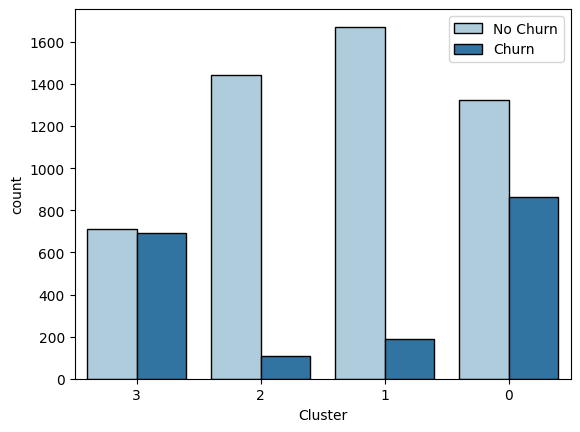

In [26]:
sns.countplot(x='Cluster', hue="Churn", data=cluster_df, palette="Paired", edgecolor = 'Black', order=cluster_df['Cluster'].value_counts(ascending=True).index)
plt.legend(title='', loc='upper right', labels=['No Churn', 'Churn'])
plt.show

It's look like the group 0 and 3 is more likely to churn more than group 1 and 2

#### Visualize Clusters with all cateorical columns

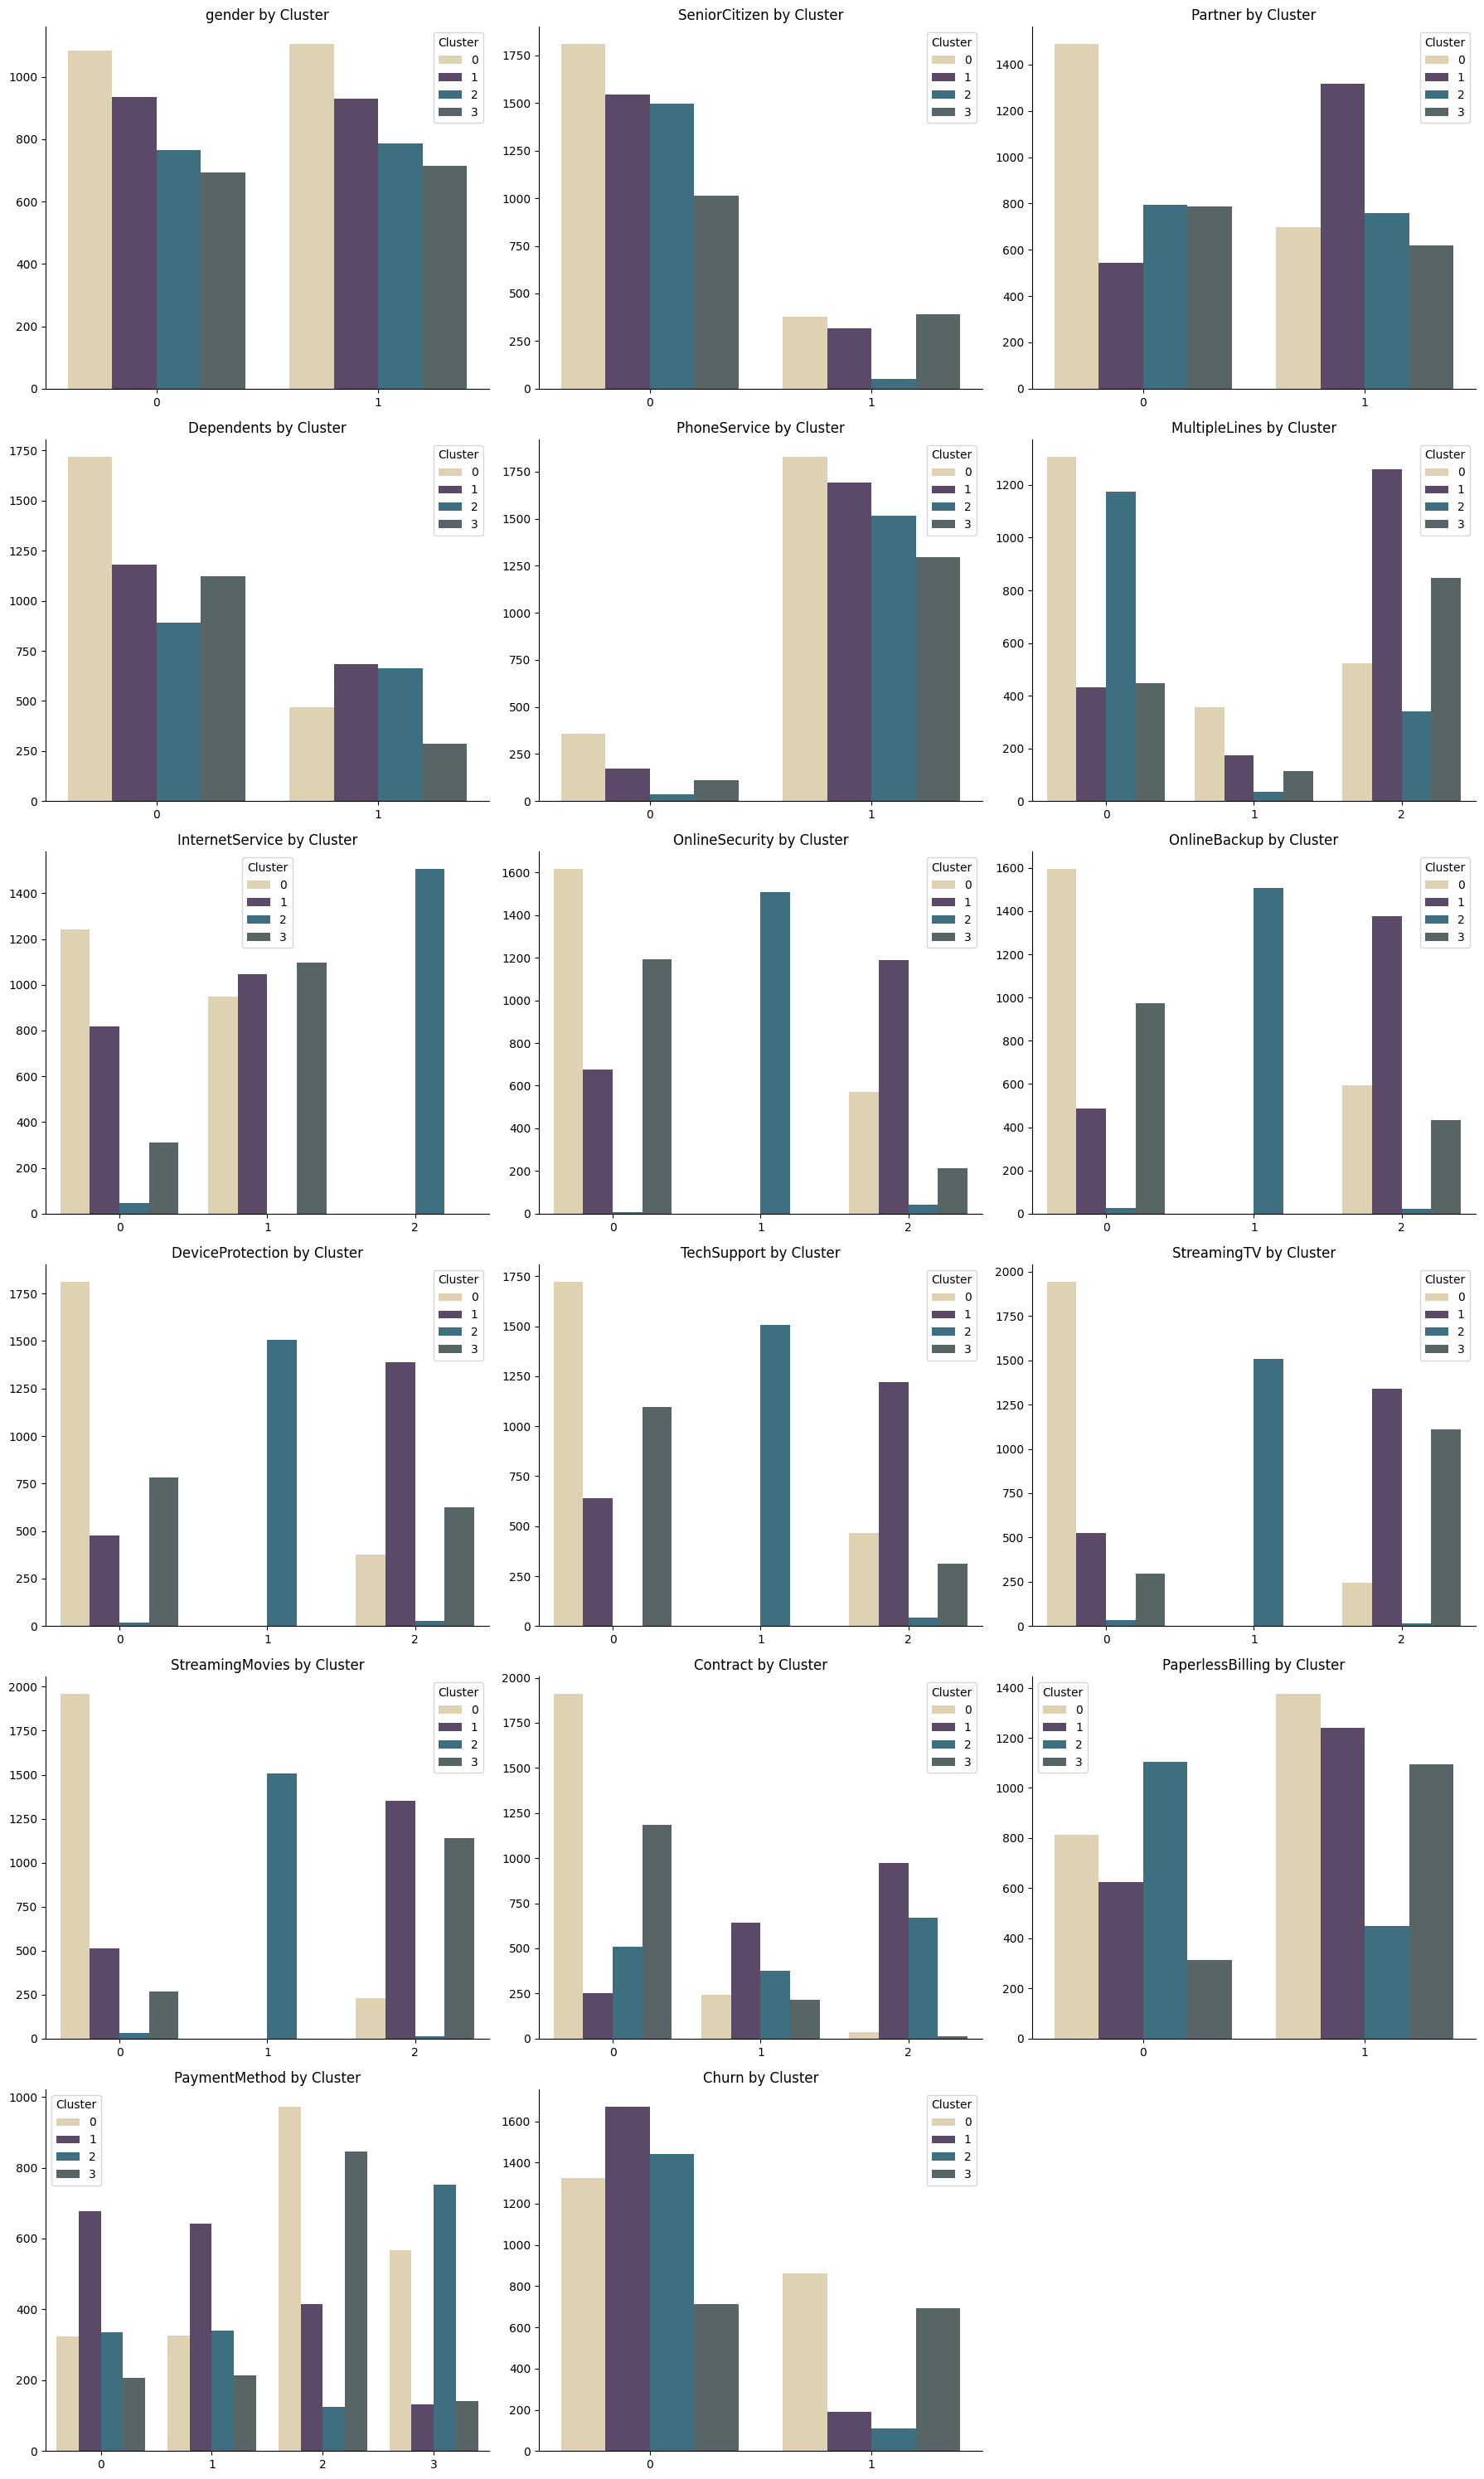

In [27]:
# Assuming cat_columns contains the names of all categorical columns except 'Cluster'
cat_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# Set the number of columns for subplot arrangement
num_cols = 3
num_rows = (len(cat_columns) + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 5 * num_rows))

# Flatten axes if needed
if num_rows == 1:
    axes = axes.reshape(1, -1)
else:
    axes = axes.flatten()

# Set custom color palette for better visualization
colors = ['#e6d5aa', '#5b456c', '#33748b','#566769']
sns.set_palette(sns.color_palette(colors))

# Iterate through each categorical column and create count plots against 'Cluster'
for i, column in enumerate(cat_columns):
    if i < len(axes):
        sns.countplot(x=column, hue='Cluster', data=cluster_df, ax=axes[i]).set(
            title=f'{column} by Cluster', xlabel=None, ylabel=None)
        axes[i].legend(title='Cluster')
        sns.despine()

# Hide any empty subplots
for i in range(len(cat_columns), num_rows * num_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

#### Visualize Clusters with all numerical columns

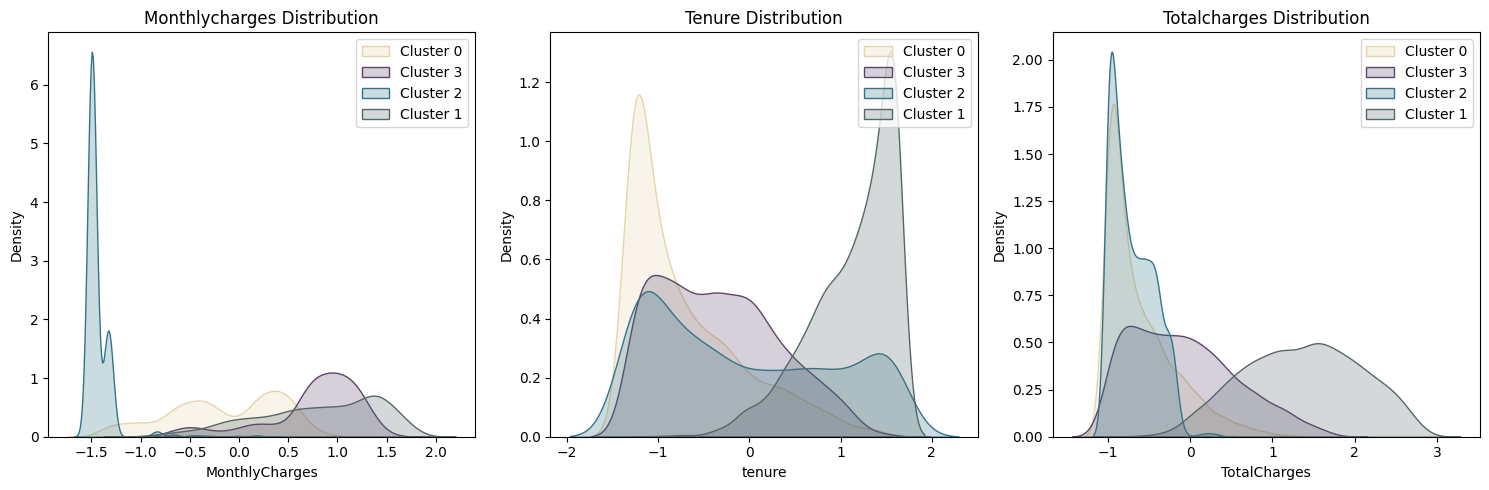

In [28]:
# Assuming num_columns contains the names of all numerical columns except 'Cluster'
num_columns = ['MonthlyCharges', 'tenure', 'TotalCharges']
# Define a color palette for the clusters
# Replace 'color_palette' with the color names or hex codes to use for each cluster
color_palette = ['#e6d5aa', '#5b456c', '#33748b','#566769']

plt.figure(figsize=(15, 5))

for i, column in enumerate(num_columns, 1):
    plt.subplot(1, 3, i)
    for idx, cluster in enumerate(cluster_df['Cluster'].unique()):
        sns.kdeplot(cluster_df[cluster_df['Cluster'] == cluster][column],
                    label=f'Cluster {cluster}',
                    shade=True,
                    color=color_palette[idx % len(color_palette)])  # Use the defined color palette
    plt.title(f'{column.capitalize()} Distribution')
    plt.legend()
plt.tight_layout()
plt.show()

#### Build some ML Predcition models

In [29]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

ml_df = df.copy()

num_features= ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_features= [i for i in ml_df.columns if i not in numerics_columns]

scaler = StandardScaler()
ml_df[num_features]= scaler.fit_transform(ml_df[num_features])

# Label Encoding for categorical columns
label_encoders = {}
for col in cat_features:
    label_encoders[col] = LabelEncoder()
    ml_df[col] = label_encoders[col].fit_transform(ml_df[col])

In [30]:
X = ml_df.drop(columns = ['Churn']) # independent valriables
y = ml_df['Churn'].values # target

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

#### GridSearchCV (Hyperparmater Tuning)

In [32]:
## Hyperparmater Tuning
def Prune_model(grid, model):
    gcv = GridSearchCV(estimator = model, param_grid = grid,cv = 3, n_jobs = -1)
    gcv.fit(X_train, y_train)
    print(gcv.best_params_)
    return gcv

#### K-Nearest Neighbors

In [33]:
'''k_grid={'leaf_size': range(1,20),
        'p': [1,2],
        'n_neighbors': range(1,21,3)}
k_model = KNeighborsClassifier()
k_grid_model= Prune_model(k_grid, k_model)
k_grid_model.score(X_train, y_train),k_grid_model.score(X_test, y_test)'''

"k_grid={'leaf_size': range(1,20),\n        'p': [1,2],\n        'n_neighbors': range(1,21,3)}\nk_model = KNeighborsClassifier()\nk_grid_model= Prune_model(k_grid, k_model)\nk_grid_model.score(X_train, y_train),k_grid_model.score(X_test, y_test)"

#### DecisionTreeClassifier

In [34]:
'''grid = {'max_depth': [10, 20, 30, None],
         'min_samples_split': [2, 3, 4],
         'min_samples_leaf': [10, 20, 30]}

ct_model = DecisionTreeClassifier()
ct_grid = Prune_model(grid,ct_model)
ct_grid.score(X_train, y_train),ct_grid.score(X_test, y_test)'''

"grid = {'max_depth': [10, 20, 30, None],\n         'min_samples_split': [2, 3, 4],\n         'min_samples_leaf': [10, 20, 30]}\n\nct_model = DecisionTreeClassifier()\nct_grid = Prune_model(grid,ct_model)\nct_grid.score(X_train, y_train),ct_grid.score(X_test, y_test)"

#### RandomForestClassifier

In [35]:
'''random_grid={'max_depth': [10, 20, 30, None],
             'min_samples_leaf': [1, 2],
             'min_samples_split': [4,7],
             'n_estimators': [250,300,350]}
rf_model = RandomForestClassifier()
rf_grid = Prune_model(random_grid, rf_model)
rf_grid.score(X_train, y_train),rf_grid.score(X_test, y_test)'''

"random_grid={'max_depth': [10, 20, 30, None],\n             'min_samples_leaf': [1, 2],\n             'min_samples_split': [4,7],\n             'n_estimators': [250,300,350]}\nrf_model = RandomForestClassifier()\nrf_grid = Prune_model(random_grid, rf_model)\nrf_grid.score(X_train, y_train),rf_grid.score(X_test, y_test)"

#### LogisticRegression

In [36]:
grid = {
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
}
LR_model = LogisticRegression()
LR_grid = Prune_model(grid, LR_model)
LR_grid.score(X_train, y_train),LR_grid.score(X_test, y_test)

{'C': 1.623776739188721, 'max_iter': 100, 'solver': 'liblinear'}


(0.8050998573466477, 0.8109843081312411)

#### Predictions Scores For All Models¶

In [37]:
accu_preds = [LR_grid.predict(X_test)] #k_grid_model.predict(X_test) , ct_grid.predict(X_test), rf_grid.predict(X_test),]

accu_df = pd.DataFrame(index=[ 'Logistic Regression',
                              #'K-Nearest Neighbors',
                              #'DecisionTreeClassifier',
                              #'Random Forest Classifier',
                              ])

accu_df['Acuuracy_score']=[accuracy_score(y_test,i) for i in accu_preds]
accu_df['F1_score']=[f1_score(y_test, i, average='weighted')  for i in accu_preds]
accu_df['Jaccard_score']=[jaccard_score(y_test, i,pos_label=0)  for i in accu_preds]
accu_df

,Acuuracy_score,F1_score,Jaccard_score
Logistic Regression,0.810984,0.803239,0.775804


#### Visualize the predcition score for diffrant models

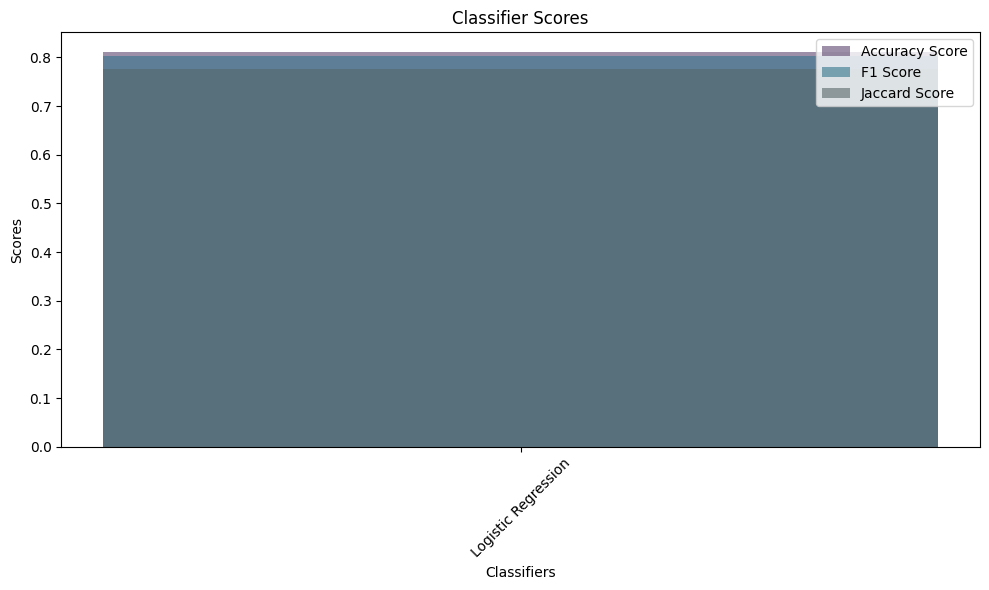

In [38]:
# Define custom colors
colors = ['#5b456c', '#33748b','#566769']  # Example custom color hex codes

plt.figure(figsize=(10, 6))

# Plotting the scores with custom colors
plt.bar(accu_df.index, accu_df['Acuuracy_score'], color=colors[0], alpha=0.6, label='Accuracy Score')
plt.bar(accu_df.index, accu_df['F1_score'], color=colors[1], alpha=0.6, label='F1 Score')
plt.bar(accu_df.index, accu_df['Jaccard_score'], color=colors[2], alpha=0.6, label='Jaccard Score')

plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.title('Classifier Scores')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

As we can see, the Logistic Regression Classifier is the best score in all metrics

In [39]:
LR_model.fit(X, y)

import joblib

# Assuming 'logistic_regression_model' is your trained Logistic Regression model
joblib.dump(LR_model, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [40]:
# Assuming 'scaler' is your fitted StandardScaler instance
joblib.dump(scaler, 'fitted_scaler.pkl')

['fitted_scaler.pkl']